## Infraestrutura

1- Você está rodando em Python 3.9+

2- Você está usando um ambiente virtual: Virtualenv ou Anaconda

3- Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

4- Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

5- Tire um printscreen do ambiente que será usado rodando em sua máquina.
![Infra](conda_infra_pd.jpg)

6- Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

https://github.com/FTNeves80/clusterizacao/blob/main/pd_validacao.ipynb

## Escolha de base de dados

### Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

### 1.Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.

    A base escolhida para o trabalho é o Wine Quality Dataset, originalmente disponibilizado no UCI Machine Learning Repository e também presente no Kaggle.
    É um dataset classico que contém características físico-químicas de vinhos tintos e brancos.

### 2.Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.

    A escolha do dataset Wine Quality se da por varios motivos.
    São eles:
    Possui rótulos (quality e type), mas não dependemos deles
    Isso permite: 
    avaliar os clusters de forma não supervisionada;
    comparar com os rótulos reais (validação externa, como ARI e NMI).

    Tamanho adequado:
    Com ~6.500 amostras, o dataset é:grande o suficiente para formar estruturas reais de clusters; pequeno o bastante para treinamento rápido e visualização eficiente.
 
    Variáveis contínuas:
    Muito apropriado para algoritmos baseados em distância.

    Assunto iteressante:
    É fácil explicar a estrutura esperada, como:
    vinhos mais doces terem comportamentos similares,
    maior acidez separar grupos distintos,
    vinhos brancos vs. tintos formarem agrupamentos próprios.

### 3.Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

### 4.Realize o pré-processamento adequado dos dados. Descreva os passos necessários.

    Respostas no corpo do Notebook


In [1]:
#Importando pandas biblioteca e lendo um arquivo CSV local em um DataFrame
import pandas as pd

df = pd.read_csv("winequalityN.csv", sep=",")
df.head()


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [2]:
#Chegando os tipos de dados de cada coluna no DataFrame
print("\nTipos de dados de cada coluna:")
print(df.dtypes)


Tipos de dados de cada coluna:
type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [4]:
# Estatísticas básicas do conjunto de dados
print("\nEstatísticas básicas:")
print(df.describe())


Estatísticas básicas:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000       

In [5]:
print("Dimensão:", df.shape)
print("###################")
df.info()

Dimensão: (6497, 13)
###################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
# Verificando valores ausentes em cada coluna
print("\nValores ausentes em cada coluna:")
print(df.isnull().sum())


Valores ausentes em cada coluna:
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [23]:
# Limpando valores ausentes (se houver)
df = df.dropna()

C:\Users\Dell\AppData\Local\Temp\ipykernel_31420\2760922987.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='quality', palette='viridis')


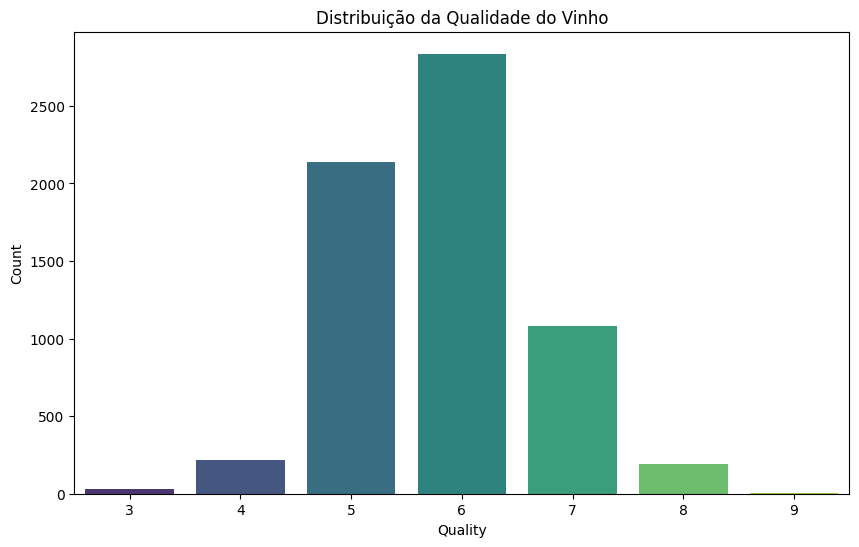

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizando a distribuição da variável alvo (qualidade do vinho)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality', palette='viridis')
plt.title('Distribuição da Qualidade do Vinho')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [12]:
import numpy as np
# Filtrando colunas não numéricas (se houver)
# assumindo que todas as colunas, exceto 'quality', são numéricas
numeric_data = df.select_dtypes(include=[np.number])

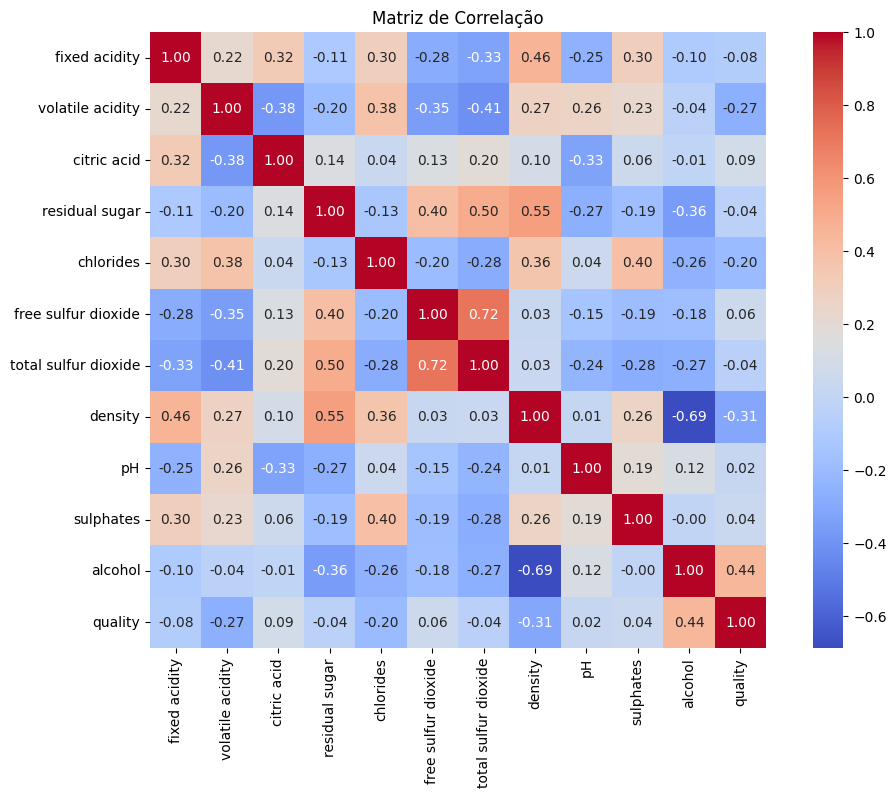

In [13]:
# Visualizando a matriz de correlação
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()  # Only use numeric data for correlation
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlação')
plt.show()

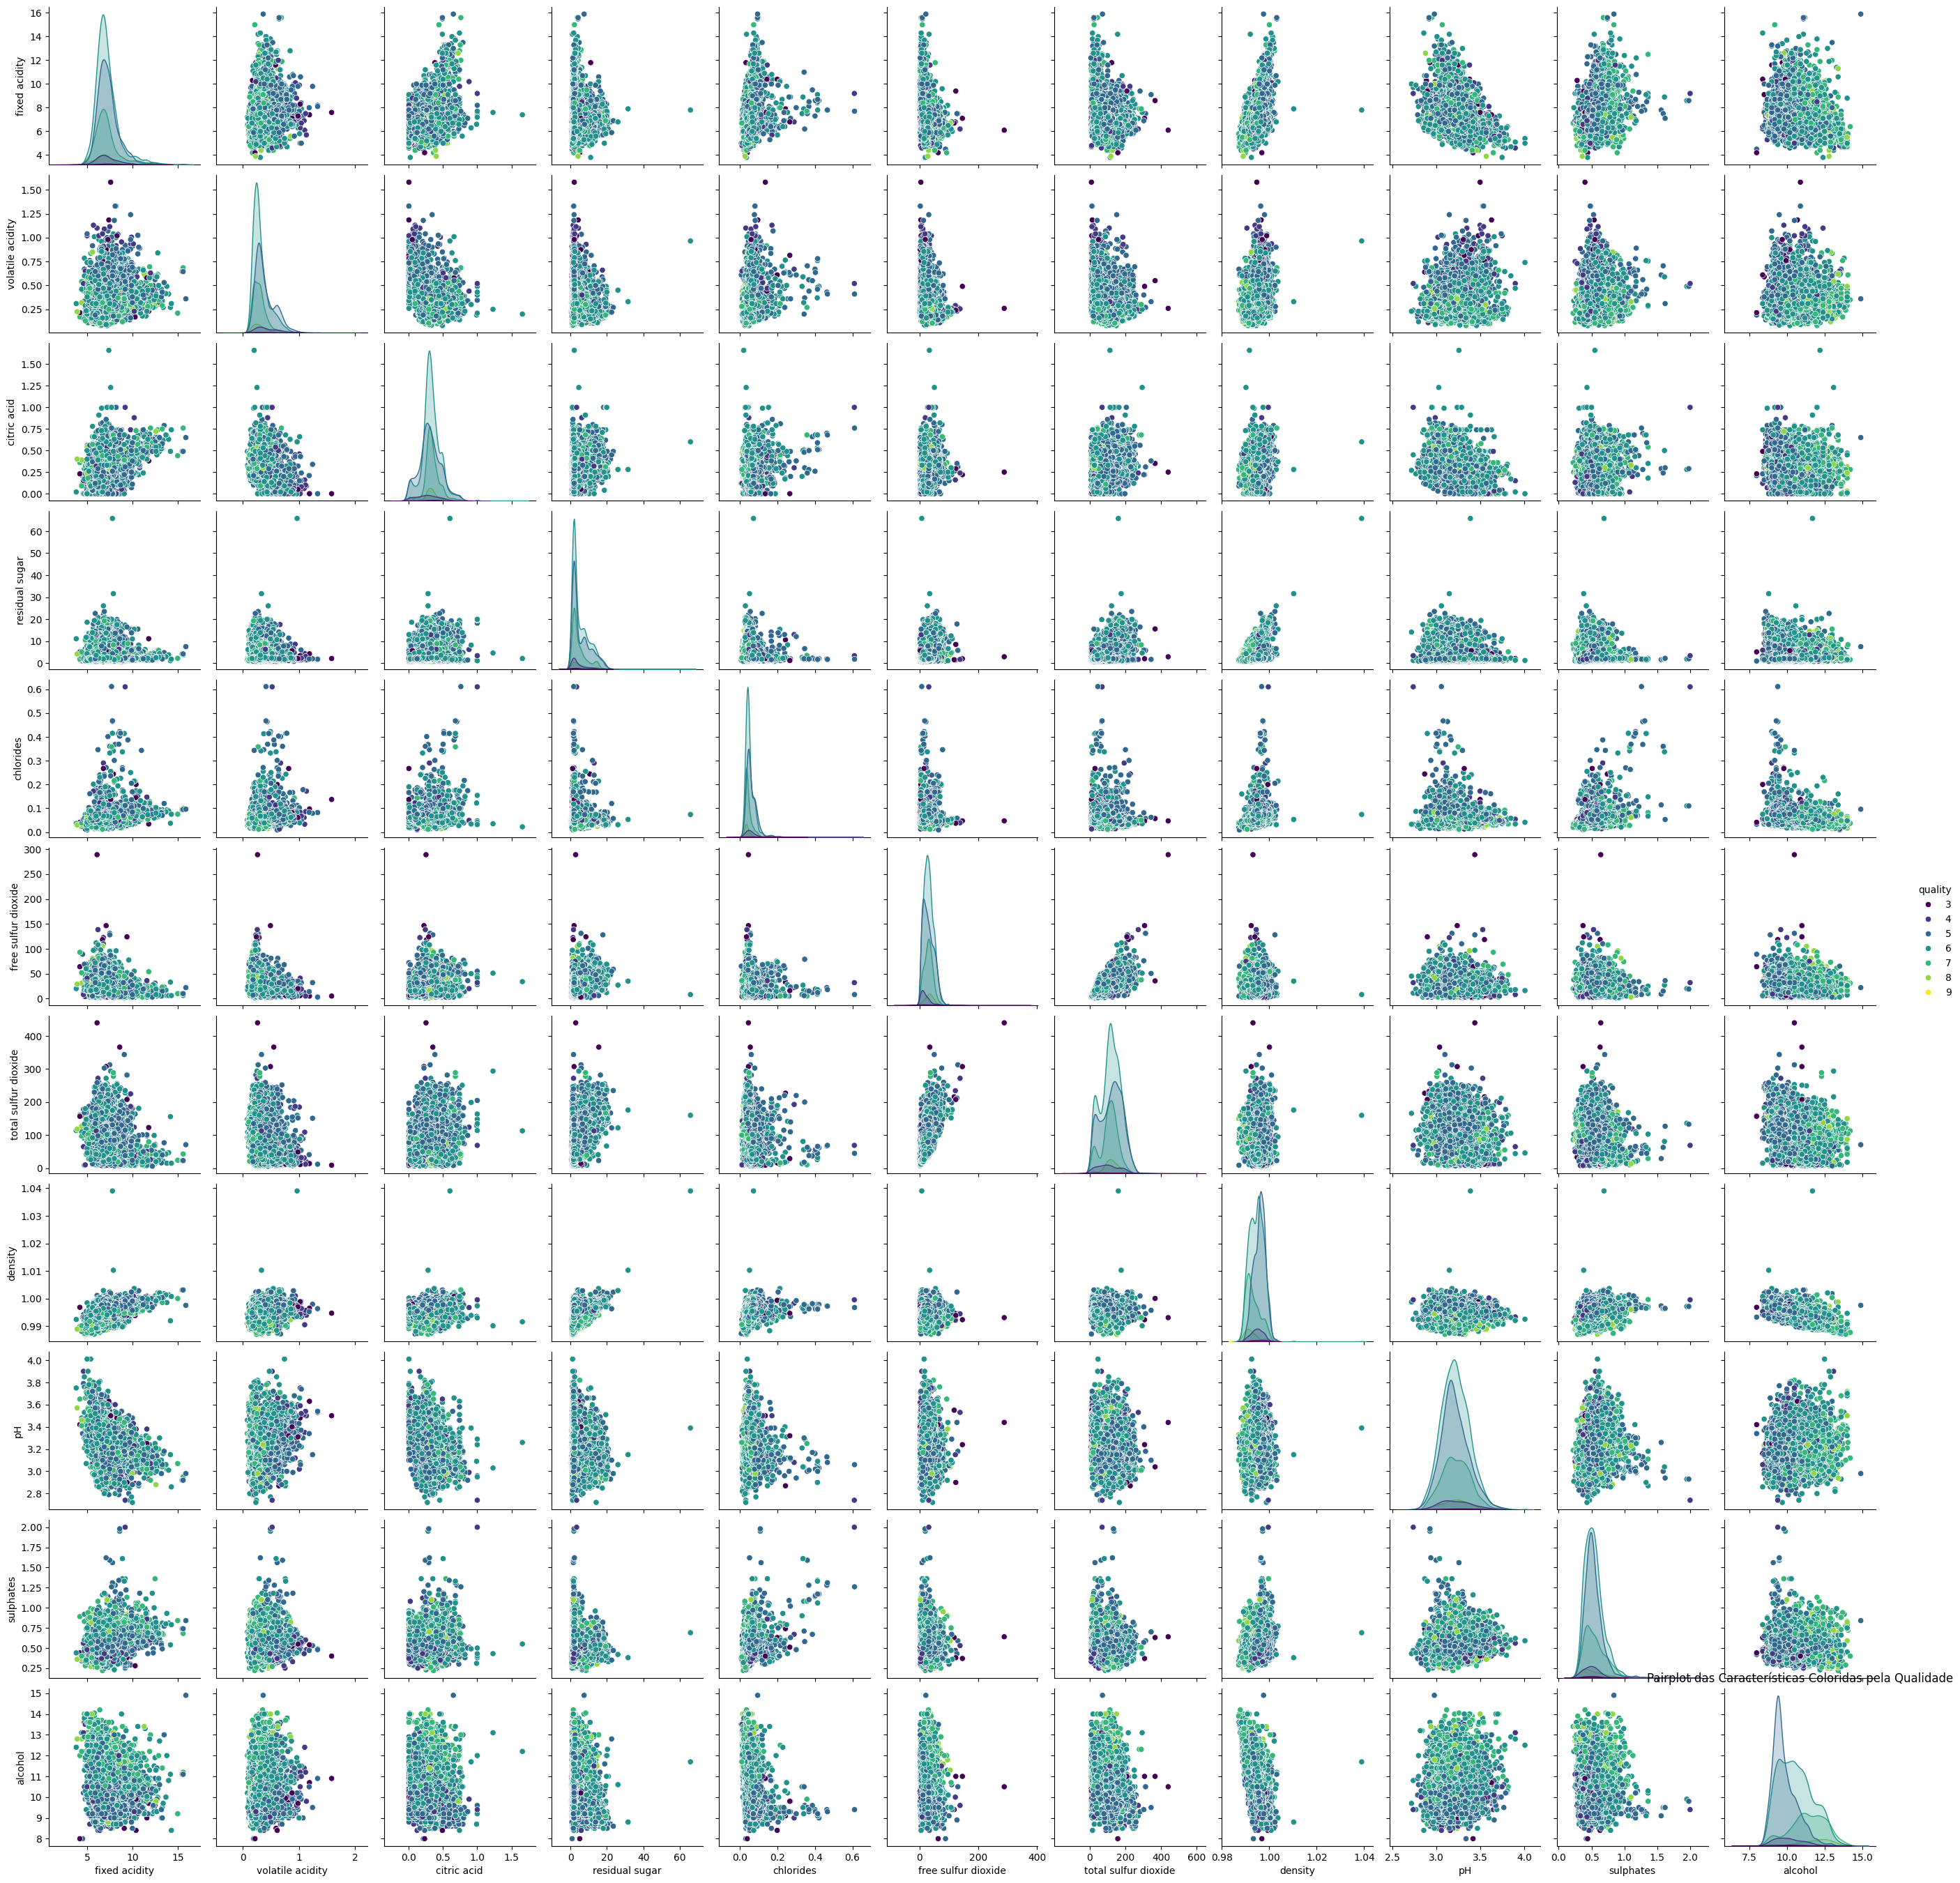

In [14]:
# Visualizando as relações entre as características
sns.pairplot(numeric_data, hue='quality', palette='viridis', diag_kind='kde')
plt.title('Pairplot das Características Coloridas pela Qualidade')
plt.show()

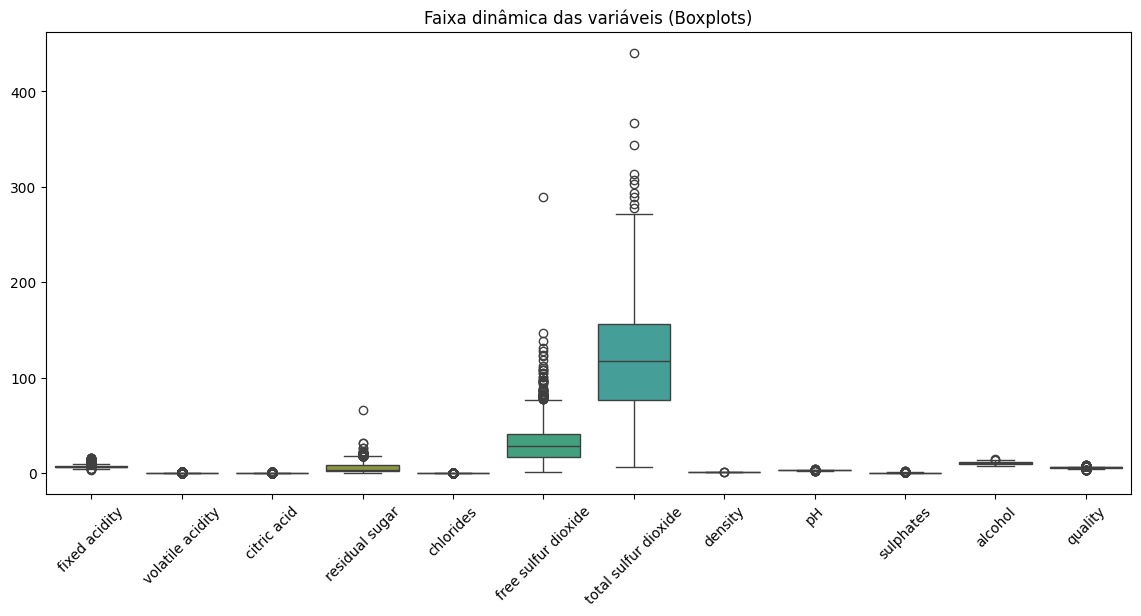

In [17]:
# Box plots for analyzing the relationship between quality and features
features = numeric_data.columns[:-1]  # Exclude the quality column
plt.figure(figsize=(14,6))
sns.boxplot(data=df.drop(columns=['type']))
plt.xticks(rotation=45)
plt.title("Faixa dinâmica das variáveis (Boxplots)")
plt.show()

### Análise dos resultados esperados

    Algumas variáveis têm escala muito diferente entre si
    ex.: residual sugar, total sulfur dioxide possuem valores bem maiores que chlorides ou sulphates.

    Existem outliers naturais em variáveis como:
    residual sugar
    free sulfur dioxide
    total sulfur dioxide

    Para métodos baseados em distância (K-Means, DBSCAN), isso é um problema:
    variáveis com maior escala dominam o cálculo da distância.

    Conclusão
    Antes da clusterização, iremos Padronizar com StandardScaler :
    Para reduzir o impacto de escalas muito diferentes.

In [24]:
# Pré-processamento de dados (normalização)
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['type'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

## Clusterização

1.Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas: K-Médias  DBScan

2.Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.

3.Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

4.Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.

5.Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?


## K-Médias

In [26]:
#1.Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. 
#Para tal, use o índice de silhueta e as técnicas: K-Médias  DBScan

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled_df)
    score = silhouette_score(X_scaled_df, labels)
    silhouette_scores.append(score)

silhouette_scores




Exception in thread Thread-8 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\Dell\anaconda3\envs\clusterizacao\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Dell\anaconda3\envs\clusterizacao\lib\site-packages\ipykernel\ipkernel.py", line 788, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\Dell\anaconda3\envs\clusterizacao\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\Dell\anaconda3\envs\clusterizacao\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\Dell\anaconda3\envs\clusterizacao\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc6 in position 79: invalid continuation byte


[0.1668365553335667,
 0.21676517220710712,
 0.23119395942238533,
 0.17513601096844553,
 0.16611982213121076,
 0.14366749021006012,
 0.12525347721103644,
 0.11734435735252348,
 0.12365099897407558]

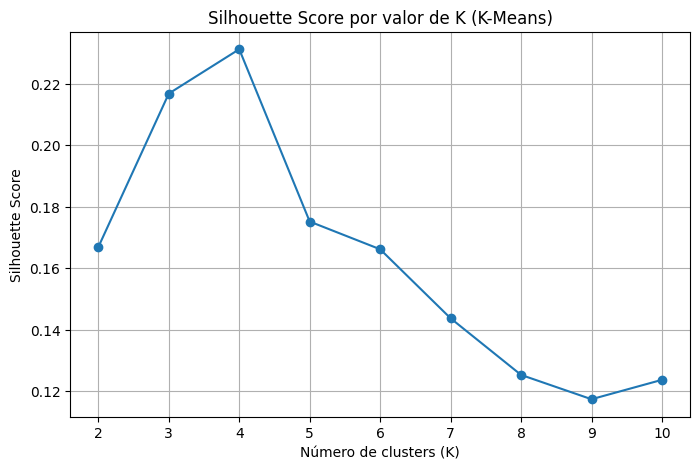

In [27]:
# Grafico dos scores de silhueta

plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score por valor de K (K-Means)")
plt.grid(True)
plt.show()

In [34]:
# Aplicando K-Means com o número ótimo de clusters 
# Analisando o gráfico, o melhor K parece ser 4
best_k = 4  
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(X_scaled_df)
df['cluster_kmeans'] = cluster_labels_kmeans


In [37]:
cluster_counts = df['cluster_kmeans'].value_counts().sort_index()
print(cluster_counts)


cluster_kmeans
0    1929
1    2820
2     656
3    1058
Name: count, dtype: int64


## DBScan

In [38]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=10)
cluster_labels_dbscan = dbscan.fit_predict(X_scaled_df)
df['cluster_dbscan'] = cluster_labels_dbscan

In [39]:
# Verificando a contagem de pontos em cada cluster do DBSCAN
df['cluster_dbscan'].value_counts().sort_index()


cluster_dbscan
-1    6441
 0      22
Name: count, dtype: int64

In [ ]:
#2.Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. 
# Mostre o gráfico e justifique o número de clusters escolhidos.



## Medidas de similaridade

1.Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

2.Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

3.Indique um caso de uso para essa solução projetada.

4.Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

